In [2]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [18]:
with open('./rewards/16 rewards.pkl', 'rb') as f:
    rewards = pkl.load(f)
with open('./rewards/num_steps_per_round 3860 runden.pkl', 'rb') as f:
    num_steps = pkl.load(f)

In [19]:
coef = np.polyfit(range(len(rewards)), rewards, 1)
poly1d_fn = np.poly1d(coef)
x = range(len(rewards))

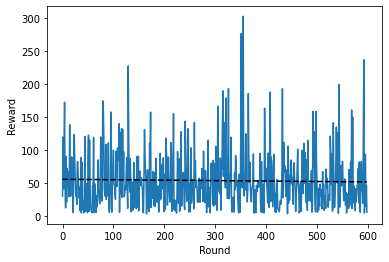

In [20]:
plt.plot(x,rewards, x, poly1d_fn(x), '--k')
#plt.plot(rewards)
plt.ylabel("Reward")
plt.xlabel("Round")
plt.show()

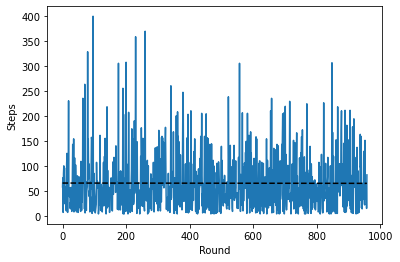

In [17]:
plt.clf()
coef = np.polyfit(range(len(num_steps)), num_steps, 1)
poly1d_fn = np.poly1d(coef)
x = range(len(num_steps))
plt.plot(x,num_steps, x, poly1d_fn(x), '--k')
#plt.plot(rewards)
plt.ylabel("Steps")
plt.xlabel("Round")
plt.show()

In [113]:
import random

In [114]:
r = 0
summe = 0
for i in range(10000000):
    r = random.random()
    if r < 0.2:
        summe += 1
print(summe/10000000)

0.2000044
